In [3]:
# Data Preprocessing and EDA

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [5]:
air_aware_data = pd.read_csv(r"C:\Users\Dell\Downloads\Air_Quality\main\Dataset_AQI4-5 - Copy.csv")

In [6]:
# Convert 'Date' or 'Datetime' column to datetime
# If your file has a 'Date' column (like city_day.csv in the India AQI dataset)
air_aware_data['Time'] = pd.to_datetime(air_aware_data['Time'], dayfirst=True, errors='coerce')
air_aware_data.rename(columns={'Time': 'timestamp'}, inplace=True)

In [7]:
print(air_aware_data.columns)
air_aware_data.head()

Index(['City', 'AQI', 'PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO', 'Latitude',
       'Longitude', 'timestamp'],
      dtype='object')


,City,AQI,PM2.5,PM10,O3,NO2,SO2,CO,Latitude,Longitude,timestamp
0,"Gulzarpet, Anantapur, India",88,88.0,71.0,26.3,4.6,2.4,6.5,14.675886,77.593027,2024-04-05 18:00:00
1,"Anand Kala Kshetram, Rajamahendravaram, India",58,58.0,45.0,14.6,12.0,6.9,6.7,16.987287,81.736318,2024-04-05 18:00:00
2,"Tirumala-APPCB, Tirupati, India",110,110.0,53.0,15.0,13.8,1.8,9.0,13.670000,79.350000,2024-04-05 18:00:00
3,"PWD Grounds, Vijayawada, India",-,52.0,NaN,5.1,0.7,4.9,4.2,16.507014,80.627767,NaT
4,"Naharlagun, Naharlagun, India",53,53.0,18.0,1.0,1.1,1.6,2.4,27.103358,93.679645,2024-04-05 09:00:00


In [8]:
print("Info:")
display(air_aware_data.info())

print("Missing values per columns:")
display(air_aware_data.isnull().sum())

print("Descriptive stats:")
display(air_aware_data.describe(include='all').T)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   City       153 non-null    object        
 1   AQI        153 non-null    object        
 2   PM2.5      147 non-null    float64       
 3   PM10       136 non-null    float64       
 4   O3         133 non-null    float64       
 5   NO2        140 non-null    float64       
 6   SO2        136 non-null    float64       
 7   CO         133 non-null    float64       
 8   Latitude   153 non-null    float64       
 9   Longitude  153 non-null    float64       
 10  timestamp  142 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 13.3+ KB


None

Missing values per columns:


City          0
AQI           0
PM2.5         6
PM10         17
O3           20
NO2          13
SO2          17
CO           20
Latitude      0
Longitude     0
timestamp    11
dtype: int64

Descriptive stats:


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
City,153,138,"Sector 22, Chandigarh, India",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AQI,153,95,54,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PM2.5,147.0,NaN,NaN,NaN,107.034014,10.0,65.0,91.0,149.5,760.0,72.90944
PM10,136.0,NaN,NaN,NaN,75.176471,4.0,53.0,64.0,84.25,864.0,74.242733
O3,133.0,NaN,NaN,NaN,18.830827,0.1,5.7,14.1,25.2,220.6,22.275973
NO2,140.0,NaN,NaN,NaN,9.331429,0.1,2.375,5.4,10.5,198.0,17.800332
SO2,136.0,NaN,NaN,NaN,9.830882,0.1,3.6,5.3,10.9,124.4,14.282019
CO,133.0,NaN,NaN,NaN,6.801504,0.3,3.8,5.7,7.9,51.0,6.189935
Latitude,153.0,NaN,NaN,NaN,24.19184,8.514909,20.007328,25.204762,28.406963,53.58904,7.923528
Longitude,153.0,NaN,NaN,NaN,77.217768,-123.005934,75.9052,77.984321,84.663264,142.94797,22.282424


In [9]:
# Handle missing values, duplicates, and wrong data

In [10]:
# Drop duplicates
air_aware_data.drop_duplicates(inplace=True)

In [11]:
pollutant_cols = ['AQI', 'PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']

# covert columns to numeric, coercing errors to NaN
for col in pollutant_cols:
    air_aware_data[col] = pd.to_numeric(air_aware_data[col] ,errors = 'coerce')

# Fill missing numeric values with median
for col in pollutant_cols:
    median_val = air_aware_data[col].median()
    air_aware_data[col].fillna(median_val)

# remove negative values if any
for col in pollutant_cols:
    air_aware_data = air_aware_data[air_aware_data[col] >= 0]

In [12]:
air_aware_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 0 to 152
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   City       103 non-null    object        
 1   AQI        103 non-null    float64       
 2   PM2.5      103 non-null    float64       
 3   PM10       103 non-null    float64       
 4   O3         103 non-null    float64       
 5   NO2        103 non-null    float64       
 6   SO2        103 non-null    float64       
 7   CO         103 non-null    float64       
 8   Latitude   103 non-null    float64       
 9   Longitude  103 non-null    float64       
 10  timestamp  98 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 9.7+ KB


In [13]:
# Exploratory Data Analysis(EDA)

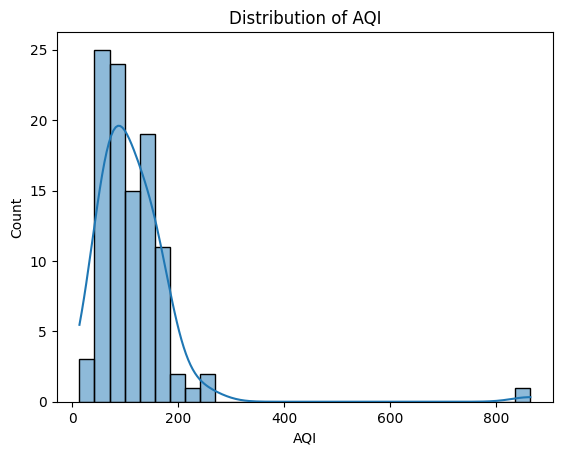

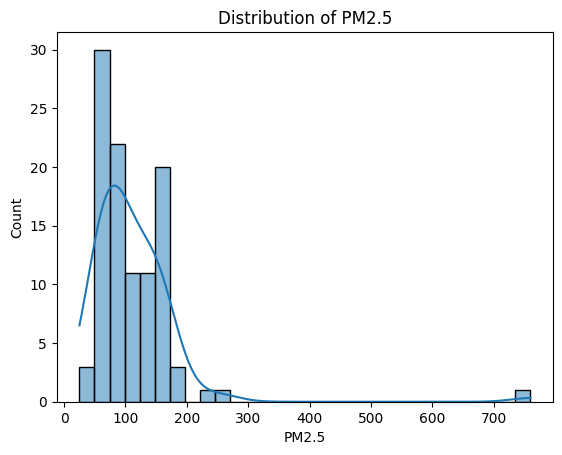

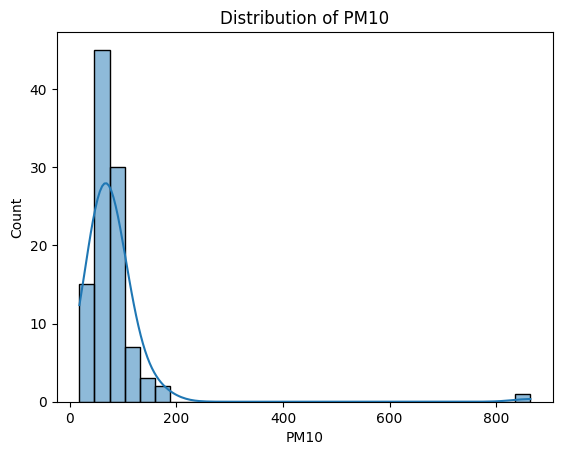

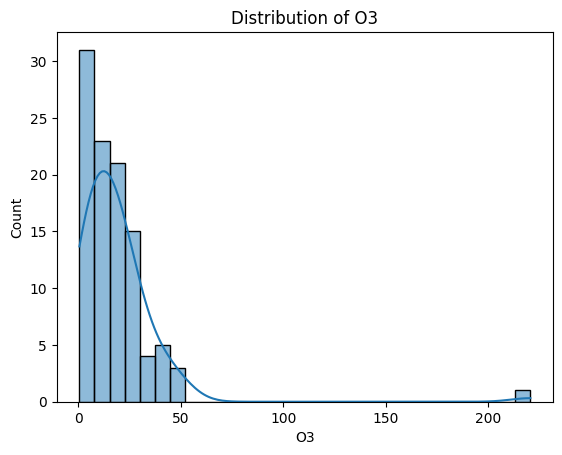

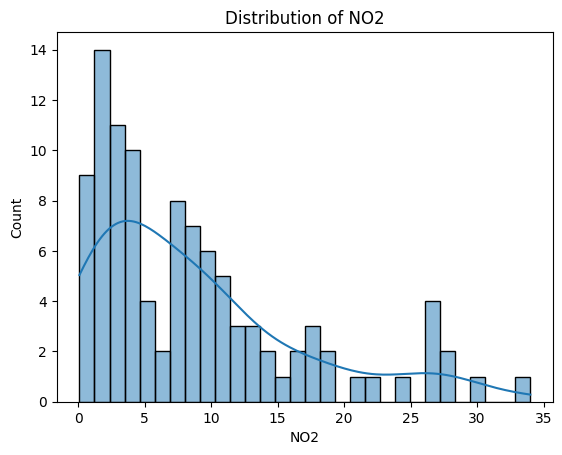

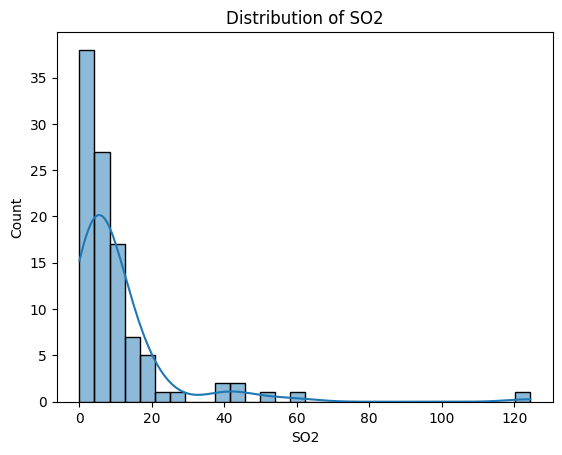

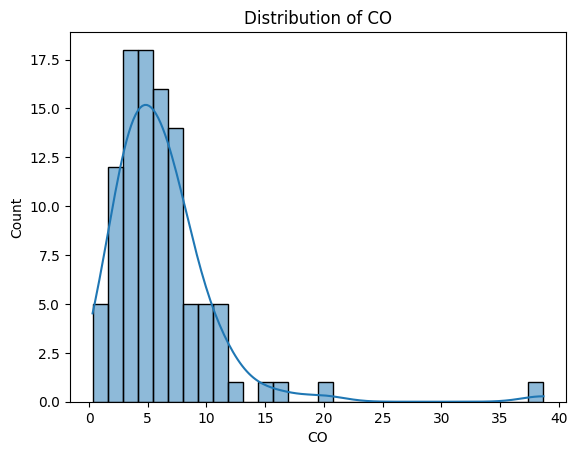

In [15]:
for col in pollutant_cols:
    plt.figure(figure=(6,4))
    sns.histplot(air_aware_data[col] , bins = 30 , kde = True)
    plt.title(f'Distribution of {col}')
    plt.show()
    

In [16]:
# Feature Scaling

In [17]:
# Scale all numeric pollutant columns between 0 and 1
scaler = MinMaxScaler()
air_aware_data[pollutant_cols] = scaler.fit_transform(air_aware_data[pollutant_cols])

print("Scaled data sample:\n", air_aware_data.head())

Scaled data sample:
                                             City       AQI     PM2.5  \
0                    Gulzarpet, Anantapur, India  0.087059  0.085714   
1  Anand Kala Kshetram, Rajamahendravaram, India  0.051765  0.044898   
2                Tirumala-APPCB, Tirupati, India  0.112941  0.115646   
4                  Naharlagun, Naharlagun, India  0.045882  0.038095   
5                    Pan Bazaar, Guwahati, India  0.108235  0.089796   

       PM10        O3       NO2       SO2        CO   Latitude  Longitude  \
0  0.062648  0.117219  0.132743  0.018504  0.161458  14.675886  77.593027   
1  0.031915  0.064062  0.351032  0.054706  0.166667  16.987287  81.736318   
2  0.041371  0.065879  0.404130  0.013677  0.226562  13.670000  79.350000   
4  0.000000  0.002272  0.029499  0.012068  0.054687  27.103358  93.679645   
5  0.104019  0.029986  0.047198  0.204344  0.145833  26.187500  91.744194   

            timestamp  
0 2024-04-05 18:00:00  
1 2024-04-05 18:00:00  
2 2024-04-0

In [18]:
# Features and target
X = air_aware_data[['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']]
y = air_aware_data['AQI']

print("Feature sample:\n", X.head())
print("Target sample:\n", y.head())

Feature sample:
       PM2.5      PM10        O3       NO2       SO2        CO
0  0.085714  0.062648  0.117219  0.132743  0.018504  0.161458
1  0.044898  0.031915  0.064062  0.351032  0.054706  0.166667
2  0.115646  0.041371  0.065879  0.404130  0.013677  0.226562
4  0.038095  0.000000  0.002272  0.029499  0.012068  0.054687
5  0.089796  0.104019  0.029986  0.047198  0.204344  0.145833
Target sample:
 0    0.087059
1    0.051765
2    0.112941
4    0.045882
5    0.108235
Name: AQI, dtype: float64


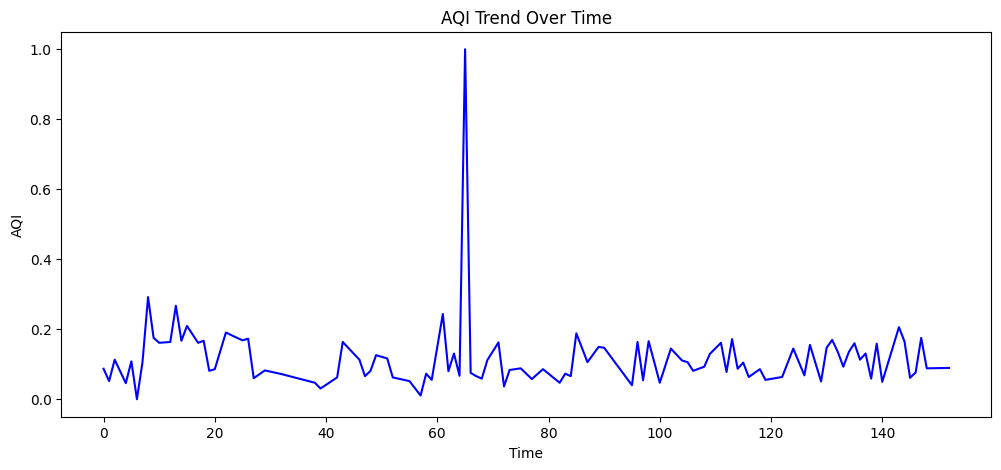

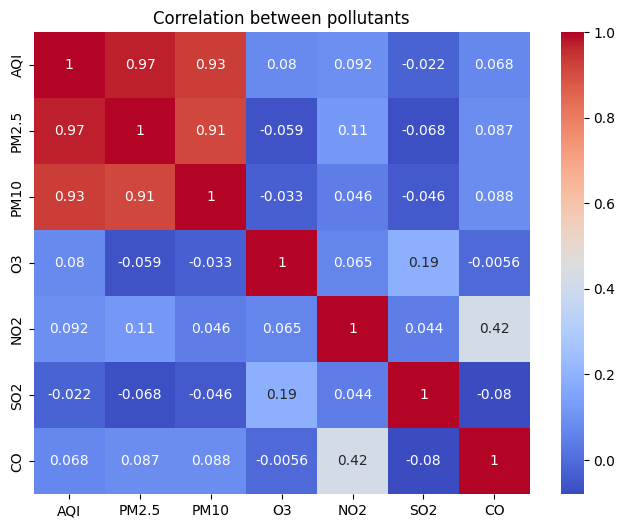

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# AQI over time
plt.figure(figsize=(12,5))
plt.plot(air_aware_data.index, air_aware_data['AQI'], color='blue')
plt.xlabel("Time")
plt.ylabel("AQI")
plt.title("AQI Trend Over Time")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(air_aware_data[pollutant_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between pollutants")
plt.show()

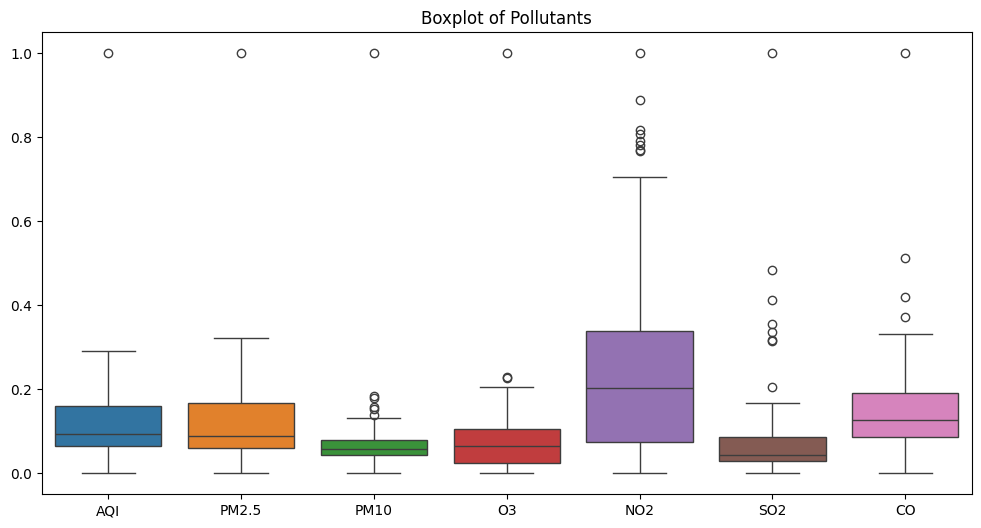

In [20]:
#Visual summary: boxplots for pollutants
pollutant_cols = ['AQI','PM2.5','PM10','O3','NO2','SO2','CO']
plt.figure(figsize=(12,6))
sns.boxplot(data=air_aware_data[pollutant_cols])
plt.title("Boxplot of Pollutants")
plt.show()

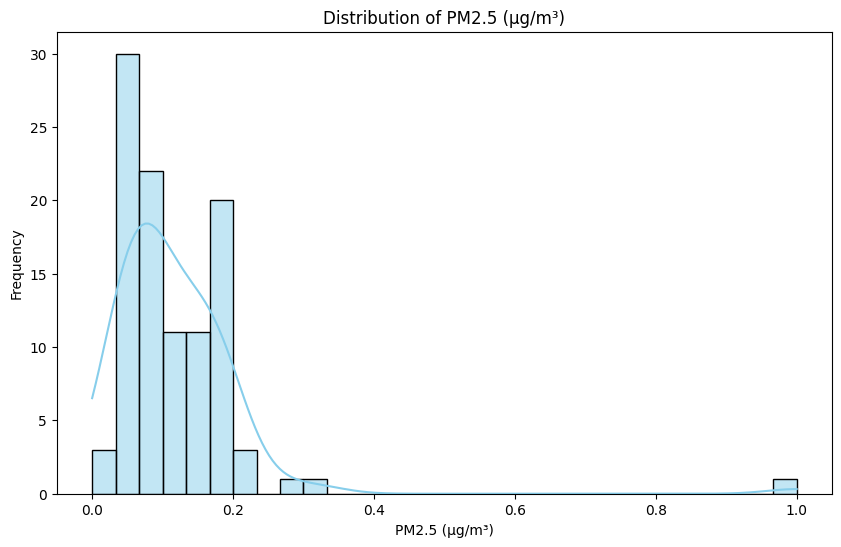

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(air_aware_data['PM2.5'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of PM2.5 (µg/m³)")
plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("Frequency")
plt.show()

In [22]:
# Frequency table for PM2.5 ranges
bins = [0, 30, 60, 90, 120, 150, 180, 210, 300]
labels = ['0-30','31-60','61-90','91-120','121-150','151-180','181-210','211-300']
air_aware_data['PM2.5_range'] = pd.cut(air_aware_data['PM2.5'], bins=bins, labels=labels)
freq_table = air_aware_data['PM2.5_range'].value_counts().sort_index()
print("===== PM2.5 Frequency Table =====")
print(freq_table)

===== PM2.5 Frequency Table =====
PM2.5_range
0-30       102
31-60        0
61-90        0
91-120       0
121-150      0
151-180      0
181-210      0
211-300      0
Name: count, dtype: int64


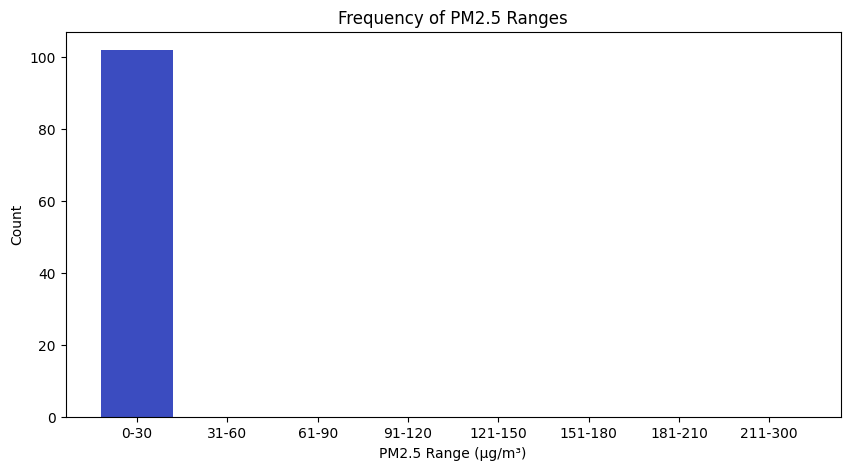

In [23]:
# Barplot of PM2.5 frequency without warning
plt.figure(figsize=(10,5))
plt.bar(freq_table.index.astype(str), freq_table.values, color=plt.cm.coolwarm(np.linspace(0,1,len(freq_table))))
plt.title("Frequency of PM2.5 Ranges")
plt.xlabel("PM2.5 Range (µg/m³)")
plt.ylabel("Count")
plt.show()


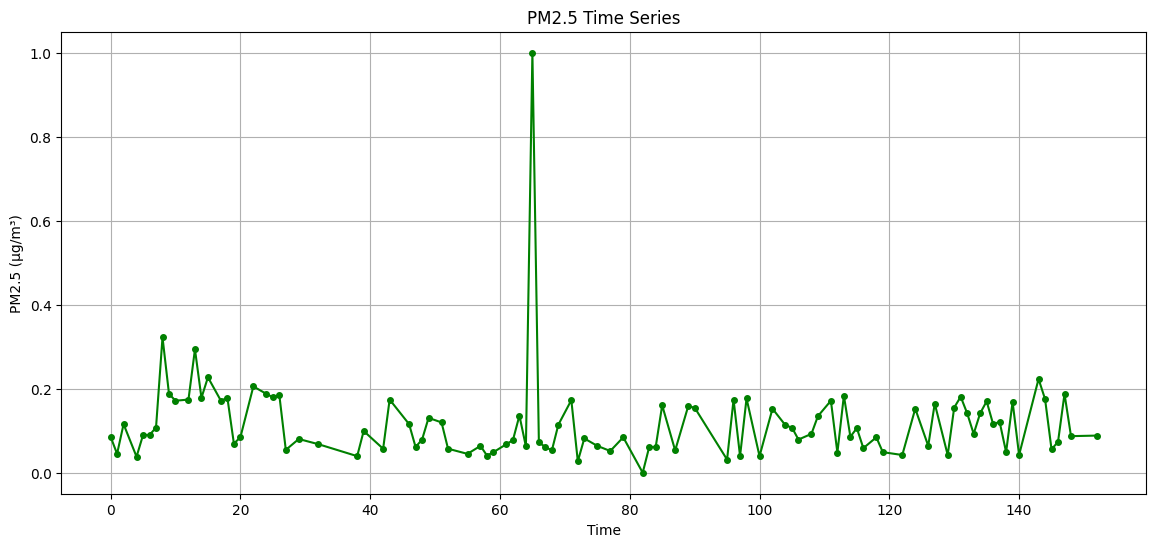

In [24]:
plt.figure(figsize=(14,6))
plt.plot(air_aware_data.index, air_aware_data['PM2.5'], color='green', marker='o', markersize=4)
plt.title("PM2.5 Time Series")
plt.xlabel("Time")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.show()
